Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Gasper Bizjan"

---

## 14 Instationary PDEs

In this assignment we will bring all knowledge from the further assignment together. Assume a domain $\Omega\subset\mathbb{R}^d$ and $f\colon [0,T]\times\Omega \to \mathbb{R}$ and $g\colon [0,T]\times \Gamma\subset\partial\Omega\to\mathbb{R}$. We want to find a $u\in [0,T]\times V$ for which the following equation holds

$$
\int_\Omega \partial_tu\phi + cu\phi + a\nabla u \nabla\phi = \int_\Omega f\phi   \qquad \forall \phi\in V \quad \forall t \in (0,T] \qquad (1)
$$

where $u(0,x)=u_0(x)$ for all $x\in\Omega$, $a,c$ are well choosen constants and $V= \{ u \in H^1 | u = g \text{ on } \Gamma, \partial_n u = 0  \text{ on } \partial\Omega\backslash \Gamma \}$ for all $t\in [0,T]$. For time dependent pdes we have discretize the System in time AND in space by different methodes. We will do the time discretization first by an implicite Euler scheme to get a sequenz of stationary pdes and afterward the space discretization by finite elements as done as in the last assignment. We will go more in detail by the next task. 

### 14.1 Theory

For a total time derivative we know the discreteization by 

$$
\frac{\mathrm{d}u}{\mathrm{d}t}(t^{n+1}) \approx \frac{u^{n+1}-u^{n}}{\tau} 
$$

by a so called backward difference. Assume the following easy example for a $u\in [0,T]\longrightarrow \mathbb{R}$ 

$$
\frac{\mathrm{d}u}{\mathrm{d}t}(t) + u(t) = f(t) \quad \forall t\in [0,T].
$$

We will apply the implicit Euler by choosing a timestep fixed $\tau$ and a time sequenz $(t^n)_{n=0}^N$ with $t^{n}=n\tau$ and a value sequenz $(u^{n})_{n=0}^N=(u(t^n))_{n=0}^N$. Now apply the implicite Euler by approximating the time derivative and evaluating all the other terms of $u$ in $t^{n+1}$ to get

$$
\frac{u^{n+1}-u^{n}}{\tau} + u^{n+1} = f(t^n).
$$

Now war want to discretize our variational problem (1). 

#### 14.1.1 Time discretization

Apply the implicte Euler Scheme to (1) and derive step by step the following system. 

$$
\int_\Omega \frac{1}{\tau}u^{n+1}\phi + cu^{n+1}\phi + a\nabla u^{n+1} \nabla\phi = \int_\Omega \frac{1}{\tau}u^n\phi + f(t^n)\phi   \qquad \forall \phi\in V \quad \forall n=0,1,...,N \qquad (2)
$$




#### 14.1.2 Space discretization 

The problem (2) is stationary variational Problem for every $n=1,...,N$. We know the dicretization of those systems by finite elements from the last assignments. We will get a linear system $AU^{n+1} = b$ for $n=0,1,...,N$ with 

$$
A_{ij} = \begin{cases}
\left(\frac{1}{\tau}+c\right)M_{ij} + aD_{ij}  & i \in \text{ free Dofs} \\
\delta_{ij} & \text{ else}
\end{cases} 
\quad \forall j = 0,...,N_p-1 \qquad (3)
$$

$$
b_{i} = \begin{cases}
\frac{1}{\tau}\sum_{i=0}^{N_p-1}M_{ij}U_i^n + \int_\Omega f(t^n)\varphi_i  & i \in \text{ free Dofs} \\
g(t^n,x_i) & \text{ else}
\end{cases}  \quad \forall n=0,1,...,N \qquad
\quad (4)
$$

as a full dicretization of (1) by a finite element method where $M$ is the mass matrix with 

$$
M_{ij} = \begin{cases}
\int_\Omega \varphi_j\varphi_i  & i \in \text{ free Dofs} \\
0 & \text{ else}
\end{cases} 
\quad \forall j = 0,...,N_p-1 \quad (5)
$$

and $D$ the diffusion matrix with 
$$
D_{ij} = \begin{cases}
\int_\Omega \nabla\varphi_j\nabla\varphi_i  & i \in \text{ free Dofs} \\
0 & \text{ else}
\end{cases} 
\quad \forall j = 0,...,N_p-1 \quad (6).
$$

Derive step by step the schemes of (3) and (4) for free degrees of freedom (!). 

#### Hint: 
In lecture the space discretization was done befor the time discretization. If you like you can do the tasks in the other way around. The finial schemes (3) and (4) must be the same. 



You answer here or in a pdf file

### 14.2 Solving Instationary Problems

Let assume the given instationary problem 
$$
\int_\Omega \partial_tu\phi + c \int_\Omega u\phi + a\int_\Omega\nabla u \nabla\phi = \int_\Omega f\phi   \qquad \forall \phi\in V.
$$

with initial condition $u(0,-1,y)=1$ for all $y\in [-1,1]$ and $u(0,x,y)=0$ else and where $a=1$ and $c=0.1$ on the domain $\Omega= [-1,1]^2$ with $\Gamma=\{(x,y)\vert x=-1 \text{ and } x=1\}$ and a given (time independent) source term $f(x,y)=1.0$ and (time independent) boundary values $g(-1,y)=1$ and $g(1,y)=0$ for all $y\in [-1,1]$. 

#### 14.2.1 Understanding (not graded)
Check the class ```StationaryProblem```. Understand the members ```resetSystemVector```, ```resetSystemMatrix``` and ```addDiscreteSource``` and ```setSolution```. Check again when we have to call the ```assemble``` or the ```assembleBoundaryConditions``` function. <br> <br>

#### 14.2.2 Initalize the problem

Inital a regular uniform grid with $10\times10$ points and a second order quadrature rule. Inital a stationary problem call ```prob```. For every timestep $n=1,...,N$ the vector $U^n$ is the solution of the previos step $n-1$. For $n=0$ set the solution vector of the stationary problem as (the strong interpolation) of the inital value. Assemble the system matrix and the system vector by using the scheme (3) and (4). <br>

#### 14.2.3 The time loop
Iterate the system in time by a for loop. Use $N=10$ and $\tau=0.5$. In every step<br>
$\cdot$ update the system vector $b$. Check free DOFs and DirichletDofs. <br>
$\cdot$ solve the stationary problem <br>
$\cdot$ show the solution

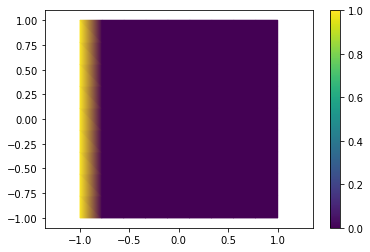

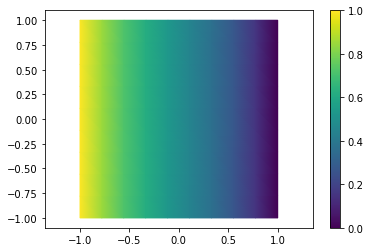

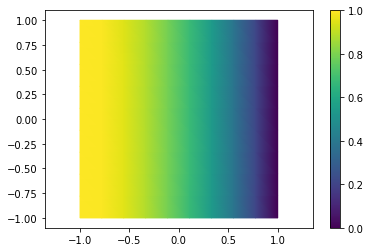

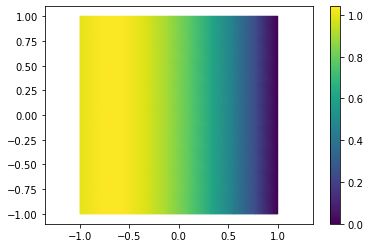

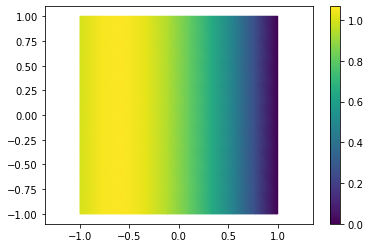

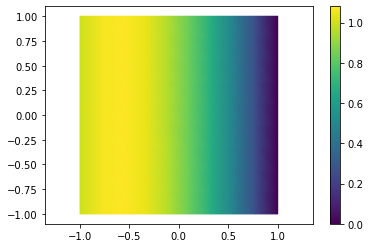

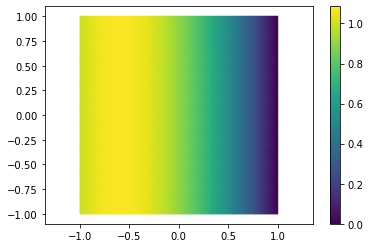

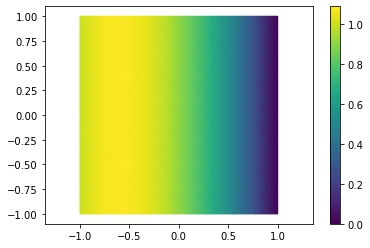

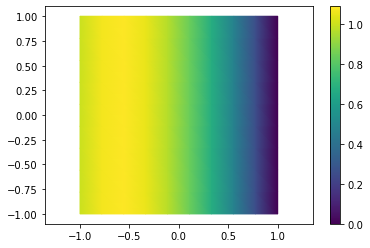

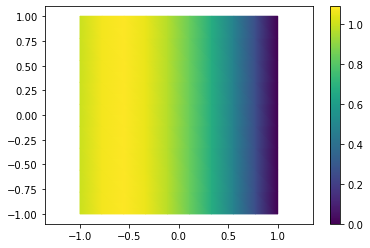

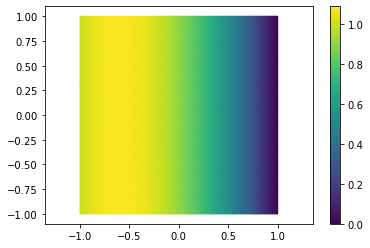

In [9]:
import numpy as np
import grid
import basis
import quadrule
import problem

# grid, basis
g = grid.Grid(-1,1,-1,1,10,10)
b = basis.Basis()
# global basis
globalBasis = basis.GlobalBasis(g, b)
#  Quadrature rule
q = quadrule.QuadratureRule(2)

# Values
tau = 0.5 # timestep
N = 10 # nr. of iterations
c = 0.1
a = 1.0

# Source
f = lambda x,y: np.ones_like(x)

# Boundary values
loc = lambda x, y: x**2 > 1-1e-5 # boolean lambda function
val = lambda x, y: -0.5*x + 0.5  # val(-1) = 1, val(1) = 0


# Stationary problem
prob = problem.StationaryProblem(globalBasis, q, loc, val)
prob.setReaction(c + 1.0/tau)
prob.setDiffusion(a)
prob.addSource(f)
prob.assemble()


# Initial conditions
U_init = np.zeros(np.shape(prob.grid.points)[0])
U_boundary = np.where(prob.grid.points[:,0]==-1.0)[0]
U_init[U_boundary] = 1.0
prob.setSolution(U_init) # initial condition u(0, *) = 0

# Show initial solution
prob.addDiscreteSource(Un/tau*prob.solution)
prob.show()

# time dependent problem
for i in range(0,N):
    prob.resetSystemVector()
    prob.assembleBoundaryConditions(val)
    prob.addSource(f)
    prob.addDiscreteSource(Un/tau*prob.solution)
    prob.solve()
    prob.show()